In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\hVACCINATION_INDIA.CSV',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [3]:
df.head(20)

,created_at,text,screen_name,location
0,30-01-2022 06:31,"b""Over 75 pc of India's adult population fully...",b'thefirstindia',"b'Jaipur, India'"
1,30-01-2022 06:12,b'Union health minister #MansukhMandaviya on S...,b'livemint',b'India'
2,30-01-2022 05:45,b'75% of Indian adults vaccinated for Covid-19...,b'bsindia',b'India'
3,30-01-2022 05:42,b'Congratulations to all countrymen for this i...,b'shaktisinghadv',"b'Karnal, Haryana, India.'"
4,30-01-2022 05:36,b'COVID-19 Vaccination in India: PM Narendra M...,b'latestly',"b'Mumbai, India'"
5,30-01-2022 05:30,b'Vaccination Camp by volunteers following the...,b'DSSNewsUpdates',"b'Sirsa, India'"
6,30-01-2022 05:28,b'India achieved 75% vaccination of all adults...,b'Tothepoint_news',b'India'
7,30-01-2022 05:21,b'More than 75% of the eligible population in ...,b'ETNOWlive',b'India'
8,30-01-2022 05:14,b'Latest: Prime Minister Narendra Modi congrat...,b'Shashwat281',"b'Madhya Pradesh, India'"
9,30-01-2022 05:11,"b'#COVID19 | India reports 2,34,281 new #coron...",b'ETNOWlive',b'India'


In [4]:
df.shape

(648, 4)

In [5]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


C:\Users\DELL\AppData\Local\Temp/ipykernel_11312/1243268230.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
C:\Users\DELL\AppData\Local\Temp/ipykernel_11312/1243268230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
C:\Users\DELL\AppData\Local\Temp/ipykernel_11312/1243268230.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


In [6]:
df.head(10)

,created_at,text,screen_name,location
0,30-01-2022 06:31,b over pc of india s adult population fully v...,b'thefirstindia',"b'Jaipur, India'"
1,30-01-2022 06:12,b union health minister mansukhmandaviya on s...,b'livemint',b'India'
2,30-01-2022 05:45,b of indian adults vaccinated for covid sa...,b'bsindia',b'India'
3,30-01-2022 05:42,b congratulations to all countrymen for this i...,b'shaktisinghadv',"b'Karnal, Haryana, India.'"
4,30-01-2022 05:36,b covid vaccination in india pm narendra mod...,b'latestly',"b'Mumbai, India'"
5,30-01-2022 05:30,b vaccination camp by volunteers following the...,b'DSSNewsUpdates',"b'Sirsa, India'"
6,30-01-2022 05:28,b india achieved vaccination of all adults ...,b'Tothepoint_news',b'India'
7,30-01-2022 05:21,b more than of the eligible population in th...,b'ETNOWlive',b'India'
8,30-01-2022 05:14,b latest prime minister narendra modi congrat...,b'Shashwat281',"b'Madhya Pradesh, India'"
9,30-01-2022 05:11,b covid india reports new coronavirus c...,b'ETNOWlive',b'India'


In [7]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df.shape[0]

648

In [9]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [10]:
df['text'][10]

'b prime minister narendramodi congratulates citizens full vaccination adults country xe x xa'

In [11]:
df.head(10)

,created_at,text,screen_name,location
0,30-01-2022 06:31,b pc india adult population fully vaccinated c...,b'thefirstindia',"b'Jaipur, India'"
1,30-01-2022 06:12,b union health minister mansukhmandaviya satur...,b'livemint',b'India'
2,30-01-2022 05:45,b indian adults vaccinated covid says pmmodi n...,b'bsindia',b'India'
3,30-01-2022 05:42,b congratulations countrymen important achieve...,b'shaktisinghadv',"b'Karnal, Haryana, India.'"
4,30-01-2022 05:36,b covid vaccination india pm narendra modi con...,b'latestly',"b'Mumbai, India'"
5,30-01-2022 05:30,b vaccination camp volunteers following pious ...,b'DSSNewsUpdates',"b'Sirsa, India'"
6,30-01-2022 05:28,b india achieved vaccination adults feat india...,b'Tothepoint_news',b'India'
7,30-01-2022 05:21,b eligible population country fully vaccinated...,b'ETNOWlive',b'India'
8,30-01-2022 05:14,b late prime minister narendra modi congratula...,b'Shashwat281',"b'Madhya Pradesh, India'"
9,30-01-2022 05:11,b covid india reports new coronavirus cases de...,b'ETNOWlive',b'India'


In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

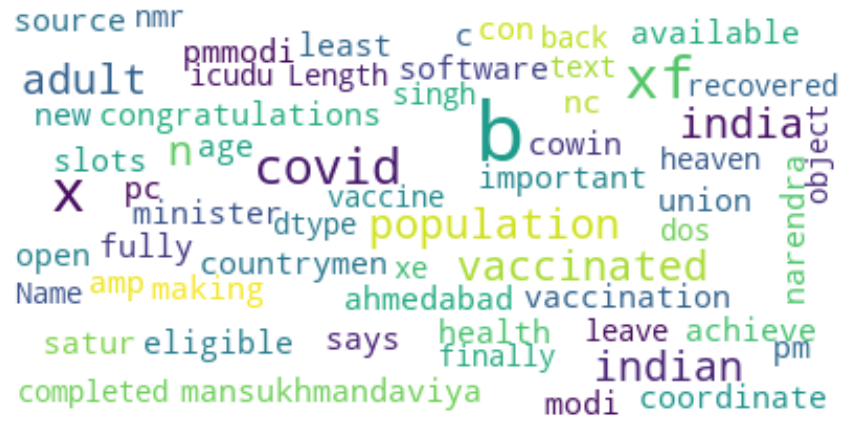

In [13]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [14]:
df.shape

(648, 4)

In [15]:
df.isna().sum
tweet=df.copy()

In [16]:
tweet.head()

,created_at,text,screen_name,location
0,30-01-2022 06:31,b pc india adult population fully vaccinated c...,b'thefirstindia',"b'Jaipur, India'"
1,30-01-2022 06:12,b union health minister mansukhmandaviya satur...,b'livemint',b'India'
2,30-01-2022 05:45,b indian adults vaccinated covid says pmmodi n...,b'bsindia',b'India'
3,30-01-2022 05:42,b congratulations countrymen important achieve...,b'shaktisinghadv',"b'Karnal, Haryana, India.'"
4,30-01-2022 05:36,b covid vaccination india pm narendra modi con...,b'latestly',"b'Mumbai, India'"


In [17]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,screen_name,location,sentiment,polarity
0,30-01-2022 06:31,b pc india adult population fully vaccinated c...,b'thefirstindia',"b'Jaipur, India'",positive,0.1
1,30-01-2022 06:12,b union health minister mansukhmandaviya satur...,b'livemint',b'India',neutral,0.0
2,30-01-2022 05:45,b indian adults vaccinated covid says pmmodi n...,b'bsindia',b'India',positive,0.136364
3,30-01-2022 05:42,b congratulations countrymen important achieve...,b'shaktisinghadv',"b'Karnal, Haryana, India.'",positive,0.4
4,30-01-2022 05:36,b covid vaccination india pm narendra modi con...,b'latestly',"b'Mumbai, India'",positive,0.75


In [18]:
tweet['sentiment'].value_counts()

neutral     417
positive    186
negative     45
Name: sentiment, dtype: int64

In [19]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINE_INDIA pol sent.csv")

In [20]:

sentiment_df.head(10)

,text,polarity,sentiment
0,b pc india adult population fully vaccinated c...,0.1,positive
1,b union health minister mansukhmandaviya satur...,0.0,neutral
2,b indian adults vaccinated covid says pmmodi n...,0.136364,positive
3,b congratulations countrymen important achieve...,0.4,positive
4,b covid vaccination india pm narendra modi con...,0.75,positive
5,b vaccination camp volunteers following pious ...,0.0,neutral
6,b india achieved vaccination adults feat india...,0.8,positive
7,b eligible population country fully vaccinated...,0.0,neutral
8,b late prime minister narendra modi congratula...,0.025,positive
9,b covid india reports new coronavirus cases de...,0.068182,positive


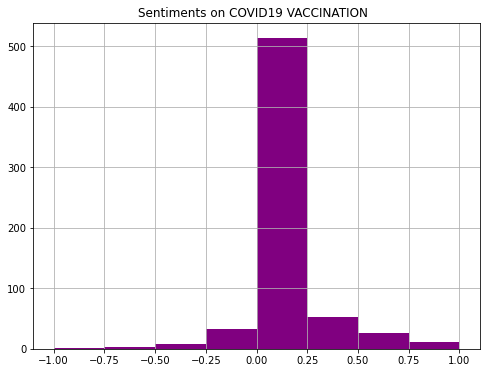

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on COVID19 VACCINATION  ")
plt.show()

In [22]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(648,)

In [23]:
x=tweet['text'].values
x.shape

(648,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(518,)
(518,)
(130,)


(130,)

neutral     417
positive    186
negative     45
Name: sentiment, dtype: int64


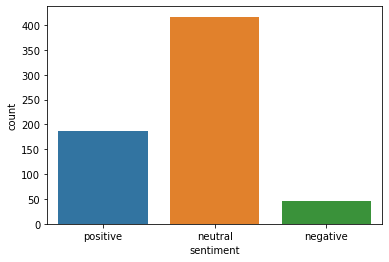

In [26]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

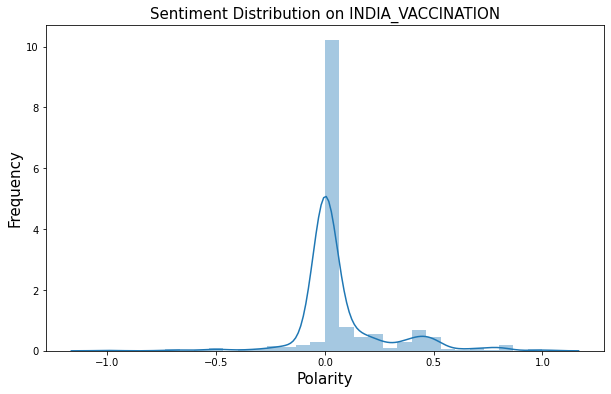

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on INDIA_VACCINATION',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

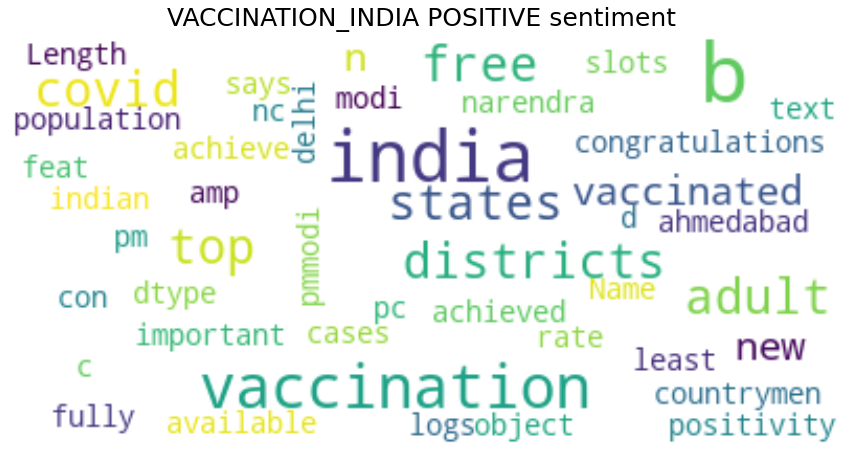

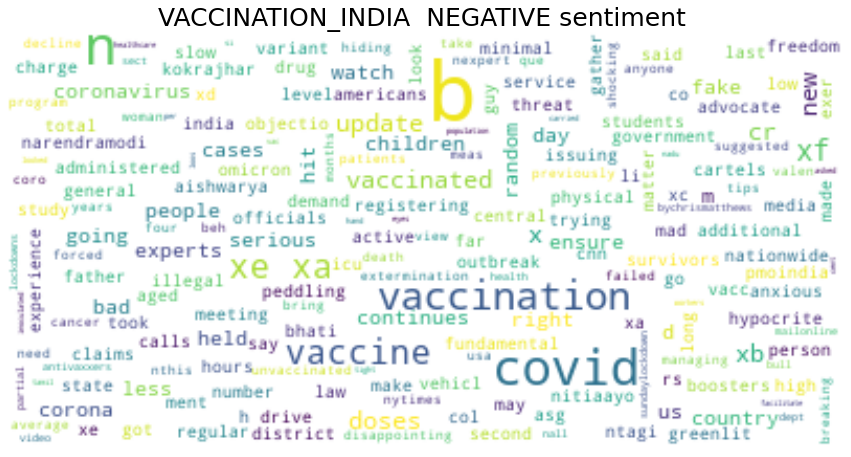

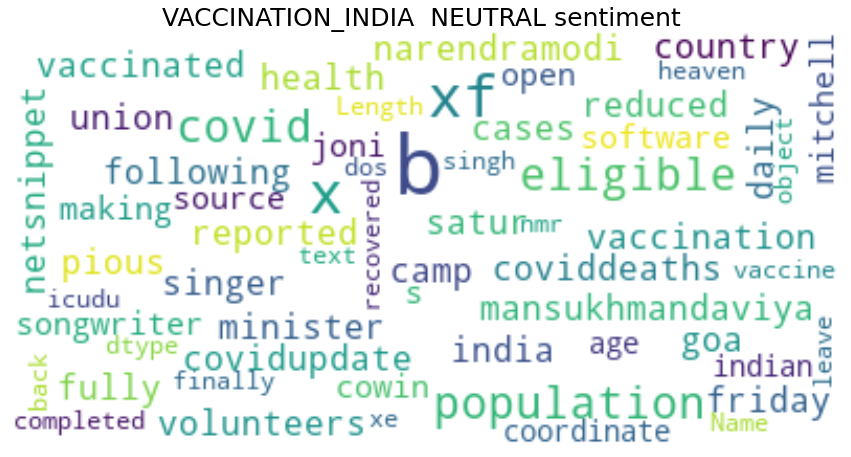

In [28]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'VACCINATION_INDIA POSITIVE sentiment ')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'VACCINATION_INDIA  NEGATIVE sentiment ')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'VACCINATION_INDIA  NEUTRAL sentiment ')

In [29]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

,created_at,text,screen_name,location,polarity
sentiment,,,,,
negative,29-01-2022 07:4129-01-2022 05:3929-01-2022 04:...,b cr vaccine doses administered far nationwide...,b'sudhakarudumula'b'HealthwireMedia'b'TT_My_Ko...,"b'Hyderabad, India'b'New Delhi, India'b'Kolkat...",-9.918644
neutral,30-01-2022 06:1230-01-2022 05:3030-01-2022 05:...,b union health minister mansukhmandaviya satur...,b'livemint'b'DSSNewsUpdates'b'ETNOWlive'b'Logi...,"b'India'b'Sirsa, India'b'India'b'India'b'Goa, ...",0.000000
positive,30-01-2022 06:3130-01-2022 05:4530-01-2022 05:...,b pc india adult population fully vaccinated c...,b'thefirstindia'b'bsindia'b'shaktisinghadv'b'l...,"b'Jaipur, India'b'India'b'Karnal, Haryana, Ind...",54.661891


In [30]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [31]:
words

['b',
 'pc',
 'india',
 'adult',
 'population',
 'fully',
 'vaccinated',
 'covid',
 'n',
 'n',
 'b',
 'union',
 'health',
 'minister',
 'mansukhmandaviya',
 'saturday',
 'held',
 'discussion',
 'regarding',
 'promotion',
 'telemedicine',
 'xe',
 'x',
 'xa',
 'b',
 'indian',
 'adults',
 'vaccinated',
 'covid',
 'says',
 'pmmodi',
 'n',
 'nread',
 'live',
 'updates',
 'n',
 'n',
 'narendramodi',
 'xe',
 'x',
 'xa',
 'b',
 'congratulations',
 'countrymen',
 'important',
 'achievement',
 'fully',
 'vaccinated',
 'adults',
 'country',
 'u',
 'xe',
 'x',
 'xa',
 'b',
 'covid',
 'vaccination',
 'india',
 'pm',
 'narendra',
 'modi',
 'congratulates',
 'citizens',
 'india',
 'successfully',
 'vaccinates',
 'xe',
 'x',
 'xa',
 'b',
 'vaccination',
 'camp',
 'volunteers',
 'following',
 'pious',
 'teachings',
 'saint',
 'dr',
 'gurmeetramrahim',
 'singh',
 'ji',
 'insan',
 'kuruksh',
 'xe',
 'x',
 'xa',
 'b',
 'india',
 'achieved',
 'vaccination',
 'adults',
 'feat',
 'indians',
 'proud',
 'congr

In [32]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

,word,frequency
0,x,828
1,xe,809
2,b,650
3,xa,634
4,n,476
5,vaccination,293
6,xb,247
7,covid,226
8,xf,209
9,slots,183


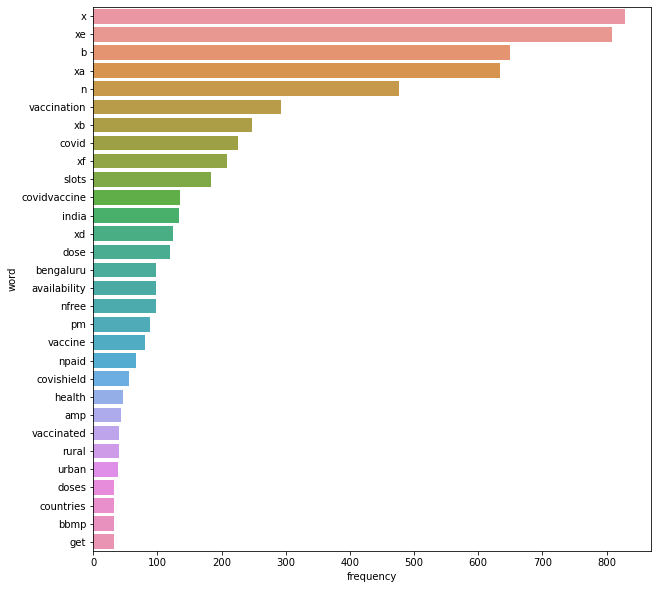

In [33]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [34]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION__INDIA Final_sent_analysis.csv',index=False)

In [35]:
sentiment_df.head()

,text,polarity,sentiment
0,b pc india adult population fully vaccinated c...,0.1,positive
1,b union health minister mansukhmandaviya satur...,0.0,neutral
2,b indian adults vaccinated covid says pmmodi n...,0.136364,positive
3,b congratulations countrymen important achieve...,0.4,positive
4,b covid vaccination india pm narendra modi con...,0.75,positive


In [36]:
sentiment_df.describe()

,text,polarity,sentiment
count,648,648.0,648
unique,470,81.0,3
top,b many countries indopacific struggle meet vac...,0.0,neutral
freq,12,417.0,417


In [37]:
sentiment_df.groupby('sentiment').size()

sentiment
negative     45
neutral     417
positive    186
dtype: int64

In [38]:
print(sentiment_df.groupby('polarity').size())

polarity
-1.00    1
-0.70    2
-0.60    1
-0.50    4
-0.40    1
        ..
 0.65    1
 0.70    4
 0.75    1
 0.80    8
 1.00    2
Length: 81, dtype: int64


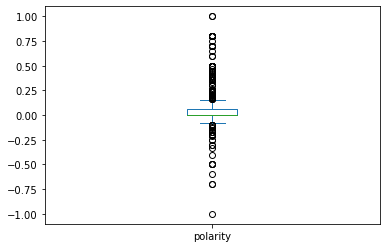

In [39]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [40]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,sentiment,polarity,text
0,positive,0.1,b pc india adult population fully vaccinated c...
1,neutral,0.0,b union health minister mansukhmandaviya satur...
2,positive,0.136364,b indian adults vaccinated covid says pmmodi n...
3,positive,0.4,b congratulations countrymen important achieve...
4,positive,0.75,b covid vaccination india pm narendra modi con...
5,neutral,0.0,b vaccination camp volunteers following pious ...
6,positive,0.8,b india achieved vaccination adults feat india...
7,neutral,0.0,b eligible population country fully vaccinated...
8,positive,0.025,b late prime minister narendra modi congratula...
9,positive,0.068182,b covid india reports new coronavirus cases de...


In [41]:
dataset2.describe()#dataset2.hist()
#plt.show()

,sentiment,polarity,text
count,648,648.0,648
unique,3,81.0,470
top,neutral,0.0,b many countries indopacific struggle meet vac...
freq,417,417.0,12


In [42]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [43]:
df1.head()

,text
0,b pfizer cornoavac vax linked heainflammation ...
1,b led mobile van publicity covid covidvaccine ...
2,b list rural urban covid vaccination centres r...
3,b vaccine daily repoin india n nvaccinated day...
4,b list rural urban covid vaccination centres r...


In [44]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [45]:
df_train.head()

,text,sentiment
0,b pfizer cornoavac vax linked heainflammation ...,neutral
1,b led mobile van publicity covid covidvaccine ...,neutral
2,b list rural urban covid vaccination centres r...,neutral
3,b vaccine daily repoin india n nvaccinated day...,positive
4,b list rural urban covid vaccination centres r...,neutral


In [46]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [47]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [48]:
df_test.head()

,text,sentiment
0,b sometime feel covid become good weapon contr...,neutral
1,b india reports lakh new cases omicron peak cr...,neutral
2,b rural bengaluru covidvaccine availability nf...,neutral
3,b anamayathc begun door door activecasefinding...,positive
4,b urban bengaluru covidvaccine availability pm...,neutral


In [49]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [50]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [51]:
df_train.head()
#punctuations are removed from news column in train dataset

,text,sentiment
0,b pfizer cornoavac vax linked heainflammation ...,neutral
1,b led mobile van publicity covid covidvaccine ...,neutral
2,b list rural urban covid vaccination centres r...,neutral
3,b vaccine daily repoin india n nvaccinated day...,positive
4,b list rural urban covid vaccination centres r...,neutral


In [52]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [54]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['b', 'vaccine', 'daily', 'repoin', 'india', 'n', 'nvaccinated', 'day', 'n', 'total', 'vaccinated', 'n', 'ncheck', 'state', 'wise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'daily', 'repoin', 'india', 'n', 'nvaccinated', 'day', 'n', 'total', 'vaccinated', 'n', 'ncheck', 'state', 'wise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indian', 'adults', 'vaccinated', 'covid', 'says', 'pmmodi', 'n', 'nread', 'live', 'updates', 'n', 'n', 'narendramodi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mp', 'reports', 'first', 'dose', 'vaccination', 'cm', 'shri', 'chouhanshivraj', 'n', 'n', 'healthminmp', 'n', 'mpfightscorona', 'n', 'jansamparkmp']
Sentence after removing stopwords: ['b', 'ahmedabad', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'ndos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'great', 'achievement', 'xf', 'xf', 'x', 'xf', 'n', 'n', '

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'vaccination', 'ensures', 'protected', 'severity', 'disease', 'n', 'n', 'xf', 'xf', 'x', 'xthe', 'major', 'job', 'vaccine', 'impro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'wave', 'upswing', 'india', 'immunity', 'resulting', 'substantial', 'adult', 'vaccination', 'coverage', 'amp', 'widespr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'going', 'good', 'scale', 'coverage', 'st', 'dose', 'done', 'around', 'nd', 'dose', 'dis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'countries', 'indopacific', 'struggle', 'meet', 'vaccination', 'targets', 'india', 'could', 'spearhead', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'srinagar', 'heritage', 'tour',

Sentence after removing stopwords: ['b', 'india', 'adult', 'population', 'given', 'first', 'dose', 'covidvaccine', 'fully', 'inoculated', 'mohfwindia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'good', 'job', 'xf', 'xf', 'x', 'xd', 'n', 'coronavirus', 'corona', 'covid', 'vaccination', 'vaccine', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'back', 'school', 'discussing', 'risks', 'amp', 'challenges', 'n', 'nmost', 'parents', 'still', 'ready', 'send', 'kids', 'school', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'pm', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'policies', 'strong', 'high', 'income', 'countries', 'whereas', 'low', 'income', 'countries', 'weak', 'amp', 'limited', 'poli', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'p

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['b', 'additional', 'rs', 'could', 'service', 'charge', 'regular', 'market', 'nod', 'expected', 'soon', 'n', 'n', 'rchitravanshi', 'reports', 'n', 'n', 'covishield', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ensure', 'minimal', 'threat', 'covid', 'outbreak', 'h', 'r', 'college', 'along', 'bmc', 'organised', 'vaccination', 'drive', 'en', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'law', 'would', 'make', 'illegal', 'demand', 'person', 'xe', 'x', 'xs', 'vaccine', 'status', 'n', 'nas', 'per', 'newly', 'proposed', 'south', 'carolina', 'law', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'questioned', 'covidvaccine', 'day', 'one', 'nthat', 'refused', 'get', 'vaccinated', 'actively', 'promot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tvven', 'fear', 'omicronvariant', 'less', 'survived', 'pandemic', 'however', 'need', 'stay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'st

In [57]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['b', 'pfizer', 'cornoavac', 'vax', 'linked', 'heainflammation', 'risk', 'adolescents', 'n', 'covid', 'pfizer', 'vaccination', 'coronavax', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'gandhi', 'nagar', 'krishnagiri', 'aw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'rural', 'urban', 'covid', 'vaccination', 'centres', 'ranchi', 'january', 'age', 'groups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'rural', 'urban', 'covid', 'vaccination', 'centres', 'ranchi', 'njanuary', 'age', 'groups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dr', 'ritu', 'rana', 'health', 'mission', 'head', 'helpageindia', 'nshares', 'views', 'webinar', 'xe', 'x', 'xc', 'helpage', 'nnetwork', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'vaccinated', 'comfoof', 'home', 'healthathome

Sentence after removing stopwords: ['b', 'vaccination', 'years', 'group', 'dips', 'reaching', 'percent', 'mark', 'vaccination', 'covid', 'vaccinationdrive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'murder', 'vaccination']
Sentence after removing stopwords: ['b', 'carrying', 'mother', 'given', 'covidvaccine', 'plandemic', 'crimesagainsthumanity', 'savechildren', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'covid', 'vaccination', 'update', 'jan', 'pm', 'nview']
Sentence after removing stopwords: ['b', 'threats', 'coercion', 'dwindle', 'vaccine', 'hesitancy', 'people', 'getting', 'vaccinated', 'xe', 'x', 'xcfear', 'xe', 'x', 'xd', 'discontinua', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grameenfoundationindia', 'covidvaccineawarenesscampaign', 'ngrameen', 'foundation', 'india', 'vaccination', 'program', 'mewat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccinated', 'precaution', 'dose', 'nvaccinatio', 'xe', 'xa', 

Sentence after removing stopwords: ['b', 'nobody', 'nworld', 'health', 'organization', 'next', 'covid', 'variant', 'contagious', 'n', 'n', 'omicron', 'omicronindia', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'cvc', 'n', 'kamrupmetropolitan', 'n', 'staysafe', 'n', 'largestvaccinationdrive', 'n', 'turnfortheteens', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indore', 'precaution', 'dose', 'salary', 'collector', 'government', 'employees', 'n', 'covid', 'n', 'vaccination', 'n', 'indore', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'study', 'private', 'hospital', 'said', 'per', 'cent', 'patients', 'died', 'current', 'wave', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amid', 'surge', 'covid', 'cases', 'meghalaya', 'anti', 'vaccination', 'protesters', 'organized', 'rally', 'capital', 'city', 'sh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govt', 'says', 'six', 'members', 'registered', 'using', 'one',

Sentence after removing stopwords: ['b', 'xe', 'xb', 'xc', 'xe', 'xb', 'xaf', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'xbe', 'xe', 'xb', 'xa', 'xe', 'xb', 'xb', 'xe', 'xb', 'xad', 'xe', 'xb', 'xbe', 'xe', 'xb', 'x', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xd', 'xe', 'xb', 'xaf', 'xe', 'xb', 'xbe', 'xe', 'xb', 'xaa', 'xe', 'xb', 'xd', 'xe', 'xb', 'xa', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xaf', 'xe', 'xb', 'xb', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'xbe', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xbf', 'xe', 'xb', 'x',

Sentence after removing stopwords: ['b', 'respective', 'boroughs', 'civic', 'body', 'allotting', 'dates', 'second', 'dose', 'kmckolkata', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'elders', 'always', 'inspire', 'us', 'overcome', 'vaccine', 'hesitances', 'today', 'residents', 'panruti', 'tamilnadu', 'got', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'auto', 'rickshaw', 'vill', 'madanheri', 'kharar', 'dated', 'n', 'covidvaccination', 'covid', 'vaccination']
Sentence after removing stopwords: ['b', 'covid', 'knocked', 'door', 'everyone', 'prepared', 'vaccination', 'preventive', 'measur', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'grameenfoundationindia', 'covidvaccineawarenesscampaign', 'ngrameen', 'foundation', 'india', 'running', 'vaccination', 'uptake', 'pr', 'xe', 'x', 'xa']


Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'karamprakash', 'n', 'news', 'n', 'vaccination', 'na', 'news', 'update', 'heared', 'yesterday', 'acc', 'fully', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'vaccination', 'schedule', 'daman']
Sentence after removing stopwords: ['b', 'health', 'minister', 'xe', 'x', 'xs', 'meeting', 'covid', 'states', 'union', 'territories', 'today', 'mohfwindia', 'mansukhmandviya', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'opinion', 'one', 'argue', 'advocating', 'vaccination', 'avoidance', 'edges', 'category', 'incitement', 'suicide', 'perhaps', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'covi

In [58]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [59]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_unigramneutral.csv",mode='w',index=False,header=False)

In [60]:
df_positive.shape

(702, 2)

In [61]:
df_negative.shape

(265, 2)

In [62]:
df_neutral.shape

(1135, 2)

In [63]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_unigram_combine.csv",mode='a',index=False,header=False)

In [64]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

,unigram,repetation
0,unigram,repetation
1,x,162
2,b,151
3,xe,149
4,xa,139


In [65]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_unigram_combine.csv",index=False)

In [66]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [67]:
df3.shape

(4268, 2)

In [68]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [69]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

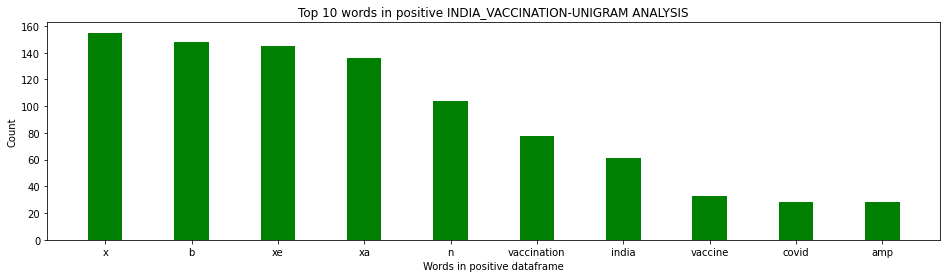

In [70]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive INDIA_VACCINATION-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

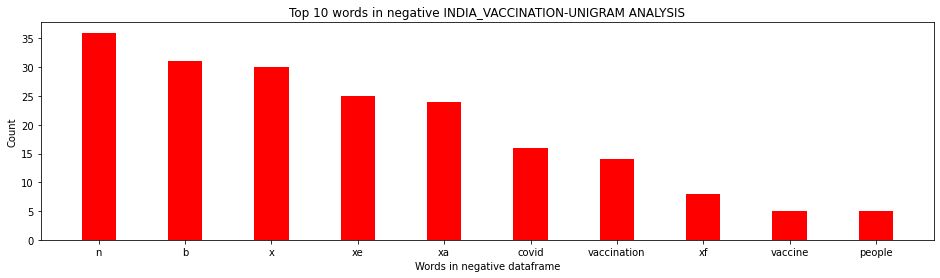

In [71]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative INDIA_VACCINATION-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

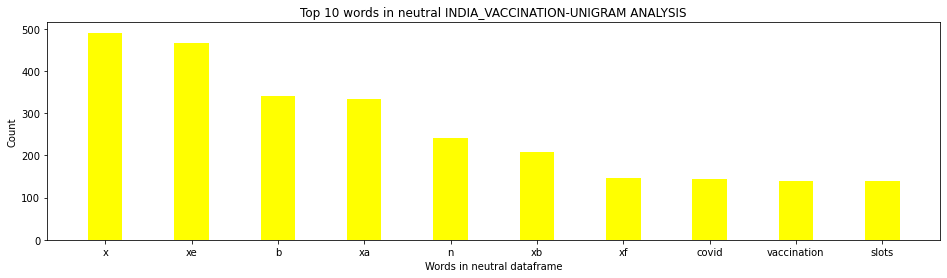

In [72]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral INDIA_VACCINATION-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [73]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [74]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['b', 'vaccine', 'daily', 'repoin', 'india', 'n', 'nvaccinated', 'day', 'n', 'total', 'vaccinated', 'n', 'ncheck', 'state', 'wise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'daily', 'repoin', 'india', 'n', 'nvaccinated', 'day', 'n', 'total', 'vaccinated', 'n', 'ncheck', 'state', 'wise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indian', 'adults', 'vaccinated', 'covid', 'says', 'pmmodi', 'n', 'nread', 'live', 'updates', 'n', 'n', 'narendramodi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mp', 'reports', 'first', 'dose', 'vaccination', 'cm', 'shri', 'chouhanshivraj', 'n', 'n', 'healthminmp', 'n', 'mpfightscorona', 'n', 'jansamparkmp']
Sentence after removing stopwords: ['b', 'ahmedabad', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'ndos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'great', 'achievement', 'xf', 'xf', 'x', 'xf', 'n', 'n', '

Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'srinagar', 'heritage', 'tour', 'buses', 'ready', 'attract', 'tourists', 'n', 'travelnews', 'tourist', 'tourism', 'srinagar', 'tour', 'jk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'large', 'pharmaceutical', 'companies', 'need', 'present', 'need', 'speed', 'transfer', 'technology', 'ensur', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aajtak', 'govt', 'india', 'clear', 'people', 'clinical', 'trial', 'vaccines', 'voluntary', 'mandatory', 'schools', 'sh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'datastory', 'india', 'far', 'administered', 'vaccine', 

Sentence after removing stopwords: ['b', 'pleased', 'share', 'dr', 'sharad', 'kumar', 'sharadk', 'chennai', 'airpodirector', 'received', 'precautio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pc', 'india', 'adult', 'population', 'fully', 'vaccinated', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'pm', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'wave', 'upswing', 'india', 'immunity', 'resulting', 'substantial', 'adult', 'vaccination', 'coverage', 'amp', 'widespr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'wave', 'upswing', 'india', 'immunity', 'resulting', 'substantial', 'adult', 'vaccination', 'coverage', 'amp', 'widespr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uttar', 'pradesh', 'crosses', 'milestone', 'administering', 'crore', 'vaccines', 'indiablooms', 'first',

In [75]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['b', 'additional', 'rs', 'could', 'service', 'charge', 'regular', 'market', 'nod', 'expected', 'soon', 'n', 'n', 'rchitravanshi', 'reports', 'n', 'n', 'covishield', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ensure', 'minimal', 'threat', 'covid', 'outbreak', 'h', 'r', 'college', 'along', 'bmc', 'organised', 'vaccination', 'drive', 'en', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'law', 'would', 'make', 'illegal', 'demand', 'person', 'xe', 'x', 'xs', 'vaccine', 'status', 'n', 'nas', 'per', 'newly', 'proposed', 'south', 'carolina', 'law', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'questioned', 'covidvaccine', 'day', 'one', 'nthat', 'refused', 'get', 'vaccinated', 'actively', 'promot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tvven', 'fear', 'omicronvariant', 'less', 'survived', 'pandemic', 'however', 'need', 'stay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'st

In [76]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['b', 'pfizer', 'cornoavac', 'vax', 'linked', 'heainflammation', 'risk', 'adolescents', 'n', 'covid', 'pfizer', 'vaccination', 'coronavax', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'gandhi', 'nagar', 'krishnagiri', 'aw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'rural', 'urban', 'covid', 'vaccination', 'centres', 'ranchi', 'january', 'age', 'groups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'rural', 'urban', 'covid', 'vaccination', 'centres', 'ranchi', 'njanuary', 'age', 'groups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dr', 'ritu', 'rana', 'health', 'mission', 'head', 'helpageindia', 'nshares', 'views', 'webinar', 'xe', 'x', 'xc', 'helpage', 'nnetwork', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'vaccinated', 'comfoof', 'home', 'healthathome

Sentence after removing stopwords: ['b', 'oh', 'dear', 'try', 'cowin', 'n', 'vaccination', 'usa']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'european', 'country', 'austria', 'going', 'make', 'vaccination', 'mandatory', 'bill', 'also', 'passed', 'low', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'years', 'group', 'dips', 'reaching', 'percent', 'mark', 'vaccination', 'covid', 'vaccinationdrive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'murder', 'vaccination']
Sentence after removing stopwords: ['b', 'carrying', 'mother', 'given', 'covidvaccine', 'plandemic', 'crimesagainsthumanity', 'savechildren', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'covid', 'vaccination', 'update', 'jan', 'pm', 'nview']
Sentence after removing stopwords: ['b', 'threats', 'coercion', 'dwindle', 'vaccine', 'hes

Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'preventing', 'covid', 'going', 'happen', 'vaccination', 'going', 'happen', 'follow', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xdwitness', 'journey', 'covidwarriors', 'led', 'world', 'largestvaccinationdrive', 'n', 'n', 'wevaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'iibr', 'reports', 'says', 'brilife', 'vaccine', 'potential', 'protect', 'covid', 'variants', 'including', 'delta', 'omicron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'specific', 'vaccines', 'help', 'control', 'covid', 'one', 'problem', 'n', 'n', 'omicroninindia', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'camp', 'held', 'ssrvm', 'godhavi', 'students', 'age', 'years

Sentence after removing stopwords: ['b', 'india', 'administers', 'crore', 'covidvaccines', 'recoveryrate', 'currently', 'percent', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'making', 'cowin', 'software', 'open', 'source', 'coordinated', 'country', 'xe', 'x', 'xs', 'vaccine', 'deployment', 'effort', 'india', 'announ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'vaccinationcertificates', 'translated', 'vacation', 'work', 'reason', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'india', 'vaccination', 'coverage', 'crosses', 'crore', 'health', 'ministry', 'n', 'n', 'covid', 'vaccination', 'n']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'essential', 'groups', 'population', 'irrespective', 'age', 'dr', 'sandeep', 'budhiraja', 'group', 'x

Sentence after removing stopwords: ['b', 'experts', 'suggested', 'need', 'bring', 'measure', 'ensure', 'sustained', 'vaccination', 'writes', 'bshajan', 'n']
Sentence after removing stopwords: ['b', 'banegaswasthindia', 'january', 'india', 'administered', 'crore', 'covid', 'vaccine', 'shots', 'xe', 'x', 'xs', 'look', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'positivity', 'rate', 'reduced', 'span', 'last', 'days', 'today', 'opposed', 'positi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saudi', 'arabia', 'fully', 'board', 'domestic', 'international', 'flights', 'n', 'travelnews', 'travel', 'saudiarabia', 'international', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'visuals', 'shared', 'online', 'sunday', 'morning', 'showed', 'health', 'department', 'team', 'travelling', 'snow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'person', 'classes', 'since', 'march', 'reopeningsafely', 'openschools', 'covid', 'kolkata'

Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'according', 'data', 'centre', 'cowin', 'dashboard', 'lakh', 'beneficiaries', 'age', 'group', 'received', 'firs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'third', 'shots', 'may', 'given', 'experts', 'sceptical', 'rethinking', 'must', 'done', 'boosters', 'hel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bihar', 'fir', 'registered', 'patna', 'multiple', 'coaching', 'institutes', 'including', 'khansir', 'n', 'khansirpatna', 'n', 'gaya', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'twenty', 'five', 'lakh', 'registered', 'minors', 'received', 'vaccine', 'gujarat', 'n', 'n', 'minors', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidresponse', 'glimpses', 'covid', 'awareness', 'vaccination', 'campaign', 'team', 

Sentence after removing stopwords: ['b', 'union', 'health', 'minister', 'mansukh', 'mandaviya', 'interact', 'health', 'ministers', 'southern', 'states', 'tomorrow', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'keralahc', 'rejects', 'plea', 'seeking', 'remove', 'pmmodi', 'photo', 'vaccination', 'certificates', 'n', 'news', 'india', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'srinagar', 'admin', 'cent', 'percent', 'coverage', 'age', 'group', 'n', 'n', 'vaccination', 'covid', 'youth', 'n', 'n']
Sentence after removing stopwords: ['b', 'vaccination', 'schedule', 'daman']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'covid', 'vaccina

In [77]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [78]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_bigram_positive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_bigram_negative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_bigram_neutral.csv",mode='w',index=False,header=False)

In [79]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_bigram_combine.csv",mode='a',index=False,header=False)

In [80]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

(9300, 2)

In [81]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

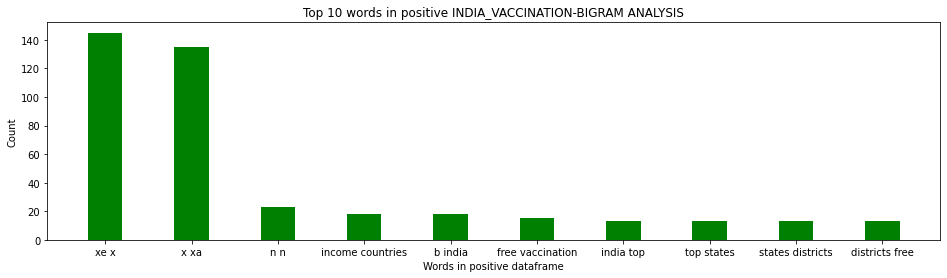

In [82]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive INDIA_VACCINATION-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

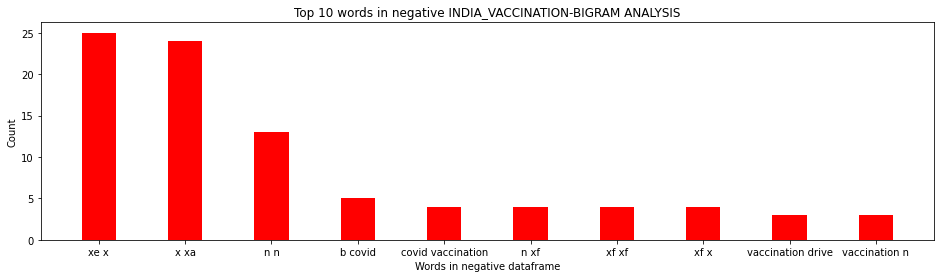

In [83]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative INDIA_VACCINATION-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

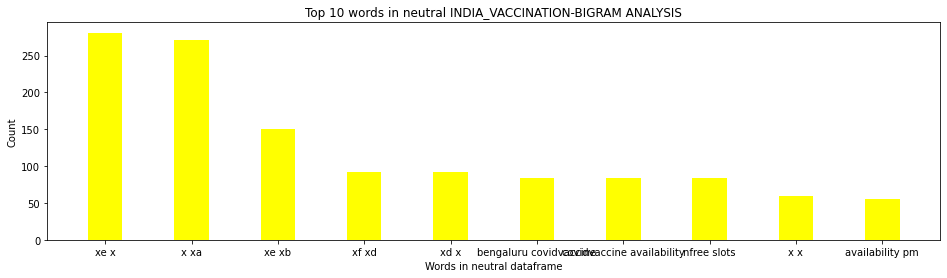

In [84]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral INDIA_VACCINATION-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [85]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['b', 'vaccine', 'daily', 'repoin', 'india', 'n', 'nvaccinated', 'day', 'n', 'total', 'vaccinated', 'n', 'ncheck', 'state', 'wise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'daily', 'repoin', 'india', 'n', 'nvaccinated', 'day', 'n', 'total', 'vaccinated', 'n', 'ncheck', 'state', 'wise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indian', 'adults', 'vaccinated', 'covid', 'says', 'pmmodi', 'n', 'nread', 'live', 'updates', 'n', 'n', 'narendramodi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mp', 'reports', 'first', 'dose', 'vaccination', 'cm', 'shri', 'chouhanshivraj', 'n', 'n', 'healthminmp', 'n', 'mpfightscorona', 'n', 'jansamparkmp']
Sentence after removing stopwords: ['b', 'ahmedabad', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'ndos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'great', 'achievement', 'xf', 'xf', 'x', 'xf', 'n', 'n', '

Sentence after removing stopwords: ['b', 'sanhitamukherj', 'rajrra', 'ptinews', 'cpimspeak', 'cpimwestbengal', 'bjpindia', 'kerala', 'high', 'couhas', 'said', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'vaccination', 'ensures', 'protected', 'severity', 'disease', 'n', 'n', 'xf', 'xf', 'x', 'xthe', 'major', 'job', 'vaccine', 'impro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'wave', 'upswing', 'india', 'immunity', 'resulting', 'substantial', 'adult', 'vaccination', 'coverage', 'amp', 'widespr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'going', 'good', 'scale', 'coverage', 'st', 'dose', 'done', 'around', 'nd', 'dose', 'dis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'countries', 'indopacific', 'struggle', 'meet', 'vaccination', 'targets', 'india', 'could', 'spearhead', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'distri

Sentence after removing stopwords: ['b', 'crclucknow', 'pdunippd', 'depwd', 'ministry', 'social', 'justice', 'amp', 'empowerment', 'govt', 'india', 'requesting', 'citizens', 'opt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'policies', 'strong', 'high', 'income', 'countries', 'whereas', 'low', 'income', 'countries', 'weak', 'amp', 'limited', 'poli', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'adult', 'population', 'given', 'first', 'dose', 'covidvaccine', 'fully', 'inoculated', 'mohfwindia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'good', 'job', 'xf', 'xf', 'x', 'xd', 'n', 'coronavirus', 'corona', 'covid', 'vaccination', 'vaccine', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b',

In [86]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['b', 'additional', 'rs', 'could', 'service', 'charge', 'regular', 'market', 'nod', 'expected', 'soon', 'n', 'n', 'rchitravanshi', 'reports', 'n', 'n', 'covishield', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ensure', 'minimal', 'threat', 'covid', 'outbreak', 'h', 'r', 'college', 'along', 'bmc', 'organised', 'vaccination', 'drive', 'en', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'law', 'would', 'make', 'illegal', 'demand', 'person', 'xe', 'x', 'xs', 'vaccine', 'status', 'n', 'nas', 'per', 'newly', 'proposed', 'south', 'carolina', 'law', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'questioned', 'covidvaccine', 'day', 'one', 'nthat', 'refused', 'get', 'vaccinated', 'actively', 'promot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tvven', 'fear', 'omicronvariant', 'less', 'survived', 'pandemic', 'however', 'need', 'stay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'st

In [87]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['b', 'pfizer', 'cornoavac', 'vax', 'linked', 'heainflammation', 'risk', 'adolescents', 'n', 'covid', 'pfizer', 'vaccination', 'coronavax', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'gandhi', 'nagar', 'krishnagiri', 'aw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'rural', 'urban', 'covid', 'vaccination', 'centres', 'ranchi', 'january', 'age', 'groups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'rural', 'urban', 'covid', 'vaccination', 'centres', 'ranchi', 'njanuary', 'age', 'groups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dr', 'ritu', 'rana', 'health', 'mission', 'head', 'helpageindia', 'nshares', 'views', 'webinar', 'xe', 'x', 'xc', 'helpage', 'nnetwork', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'vaccinated', 'comfoof', 'home', 'healthathome

Sentence after removing stopwords: ['b', 'people', 'cancer', 'treatment', 'may', 'need', 'covid', 'booster', 'vaccines', 'study', 'mohfwindia', 'n', 'n', 'cancer', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oh', 'dear', 'try', 'cowin', 'n', 'vaccination', 'usa']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'european', 'country', 'austria', 'going', 'make', 'vaccination', 'mandatory', 'bill', 'also', 'passed', 'low', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'years', 'group', 'dips', 'reaching', 'percent', 'mark', 'vaccination', 'covid', 'vaccinationdrive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'murder', 'vaccination']
Sentence after removing stopwords: ['b', 'carrying', 'mother', 'given', 'covidvaccine', 'plandemic', 'crimesagainsthumanity', 'savechildren', 'xe', 'x', 'xa']
Senten

Sentence after removing stopwords: ['b', 'dcgi', 'nod', 'bharatbiotech', 'conduct', 'clinical', 'trials', 'intranasal', 'covidvaccine', 'bbv', 'n', 'n', 'coronavirusupdates', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'answers', 'question', 'regarding', 'vaccines', 'restarting', 'regular', 'cancer', 'screening', 'ntap', 'know', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbc', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'preventing', 'covid', 'going', 'happen', 'vaccination', 'going', 'happen', 'follow', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xdwitness', 'journey', 'covidwarriors', 'led', 'world', 'largestvaccinationdrive', 'n', 'n', 'wevaccine', 'xe', 'x', 'xa']
Sentence after removi

Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'need', 'show', 'covid', 'vaccine', 'certificate', 'govt', 'india', 'said', 'vaccination', 'volunta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'booster', 'nwith', 'continuous', 'efforts', 'battle', 'covid', 'sis', 'frontline', 'workers', 'taken', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xaindia', 'xe', 'x', 'xs', 'cumulative', 'covid', 'vaccination', 'coverage', 'exceeds', 'cr', 'n', 'n', 'xe', 'x', 'xamore', 'lakh', 'vaccine', 'doses', 'administ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'eligible', 'population', 'country', 'fully', 'vaccinated', 'says', 'union', 'health', 'minister', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'training', 'community', 'resources', 'person', 'crp', 'carry', 

Sentence after removing stopwords: ['b', 'big', 'development', 'indian', 'vaccine', 'program', 'largestvaccinationdrive']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'situation', 'pain', 'pretense', 'fearless', 'face', 'xf', 'xf', 'xa', 'xb', 'n', 'bengineer', 'n', 'vaccinated', 'vaccination']
Sentence after removing stopwords: ['b', 'get', 'jabbed', 'sites', 'mega', 'vaccination', 'drive', 'covid', 'vaccination', 'n', 'thetribunechd']
Sentence after removing stopwords: ['b', 'kaqhatraback', 'xf', 'xf', 'x', 'xaf', 'pandemic', 'climate', 'n', 'note', 'virus', 'xe'

Sentence after removing stopwords: ['b', 'pandemic', 'ending', 'guesses', 'n', 'covid', 'omicronvariant', 'covid', 'covidvaccine']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'booster', 'nwith', 'continuous', 'efforts', 'battle', 'covid', 'sis', 'frontline', 'workers', 'taken', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pseudo', 'intellectuals', 'swallow', 'words', 'go', 'hide', 'rabbit', 'hole', 'n', 'vaccination']
Sentence after removing stopwords: ['b', 'vaccination', 'daman']
Sentence after removing stopwords: ['b', 'pleasure', 'meet', 'vaccination', 'team', 'woodlands', 'hospital', 'kolkata', 'n', 'ni', 'bow', '

Sentence after removing stopwords: ['b', 'health', 'srinagar', 'admin', 'cent', 'percent', 'coverage', 'age', 'group', 'n', 'n', 'vaccination', 'covid', 'youth', 'n', 'n']
Sentence after removing stopwords: ['b', 'vaccination', 'schedule', 'daman']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'covid', 'vaccination', 'coverage', 'crossed', 'crore', 'lakh', 'vaccine', 'doses', 'administered', 'sat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine'

In [88]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [89]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_trigram_neutral.csv",mode='w',index=False,header=False)

In [90]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_trigram_combine.csv",mode='a',index=False,header=False)

In [91]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_INDIA_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(8582, 2)

In [92]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [93]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [94]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

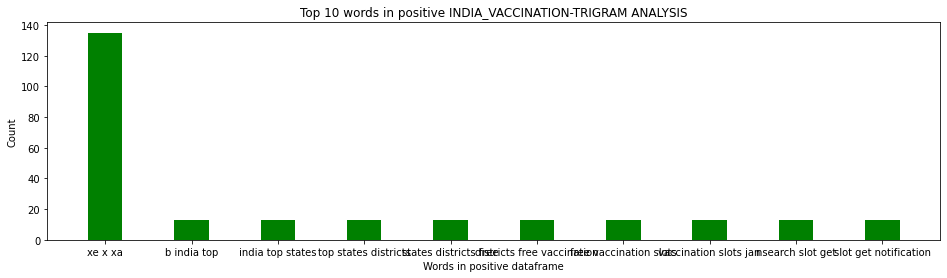

In [95]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive INDIA_VACCINATION-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

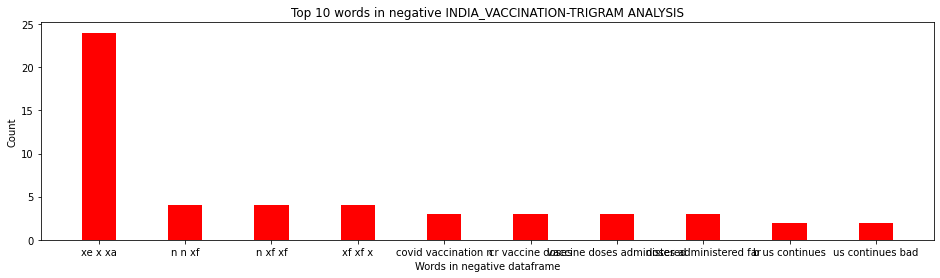

In [96]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative INDIA_VACCINATION-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

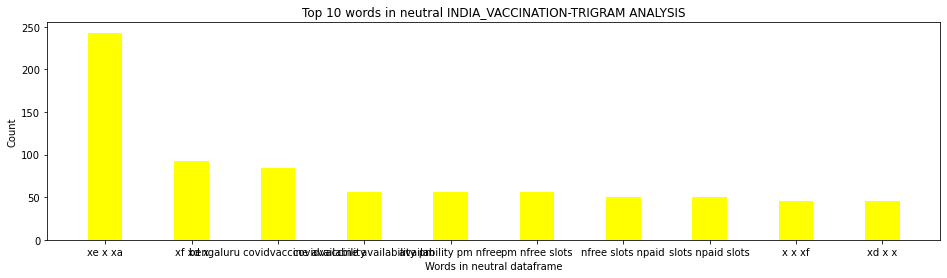

In [97]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral INDIA_VACCINATION-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()